# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

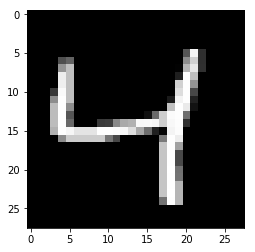

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
flattened_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, flattened_size], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, flattened_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=flattened_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='outputs')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
lr = 0.001
opt = tf.train.AdamOptimizer(lr).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6946
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6832
Epoch: 1/20... Training loss: 0.6785
Epoch: 1/20... Training loss: 0.6727
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6585
Epoch: 1/20... Training loss: 0.6502
Epoch: 1/20... Training loss: 0.6394
Epoch: 1/20... Training loss: 0.6276
Epoch: 1/20... Training loss: 0.6153
Epoch: 1/20... Training loss: 0.6002
Epoch: 1/20... Training loss: 0.5854
Epoch: 1/20... Training loss: 0.5735
Epoch: 1/20... Training loss: 0.5551
Epoch: 1/20... Training loss: 0.5358
Epoch: 1/20... Training loss: 0.5174
Epoch: 1/20... Training loss: 0.5006
Epoch: 1/20... Training loss: 0.4833
Epoch: 1/20... Training loss: 0.4642
Epoch: 1/20... Training loss: 0.4505
Epoch: 1/20... Training loss: 0.4262
Epoch: 1/20... Training loss: 0.4188
Epoch: 1/20... Training loss: 0.4054
Epoch: 1/20... Training loss: 0.3874
Epoch: 1/20... Training loss: 0.3747
E

Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.2013
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1992
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1992
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1913
E

Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1648
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1664
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1650
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1562
E

Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1379
E

Epoch: 3/20... Training loss: 0.1227
Epoch: 3/20... Training loss: 0.1234
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1248
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1235
E

Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1201
E

Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1123
E

Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1062
E

Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1019
E

Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1016
E

Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1032
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1009
E

Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0953
E

Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0913
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0

Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0864
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

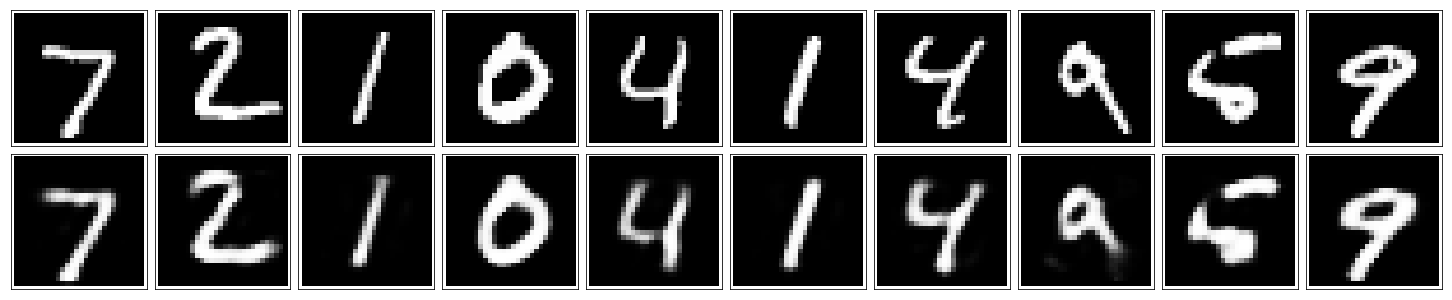

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.